# Work supply, stored energy, energy dissipation

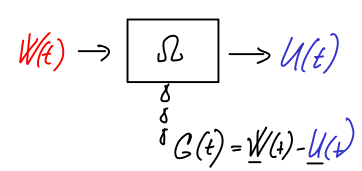
This notebook rephrases the energy definition using the analytical model derived in  
Chapter 2 - Pullout with constant bond-slip law:

[2_1_PO_LF_LM_RG.ipynb](2_1_PO_LF_LM_RG.ipynb)

The results presented there are incorporated here using the `%run` command

# Import the pullout model

- By issuing `%%capture`` we suppress output within the cell - no printing, no plotting
- Using `%run file.ipynb` the whole notebook `file.ipynb` gets executed.

After the execution we can work with all the expressions and functions derived in the notebook

In [1]:
%%capture
%run 2_1_PO_LF_LM_RG.ipynb

# Pull-out curve and state fields

Evaluation of energies includes the expressions:
\begin{align}
G &= W - U
\end{align}
which can be expressed using domain and time-integrals as follows
\begin{align}
\int_{\Omega_\mathrm{diss}} \tau(x) s_\mathrm{inel}(x) \, \mathrm{d}x 
&=
\int_0^w P(w) \, \mathrm{d}w - 
\int_{\Omega_\mathrm{el}} E \varepsilon_\mathrm{f,el}^2(x) 
 \, \mathrm{d}x
\end{align}
Thus, to evaluate the terms in this integral we need $P(w)$, 
$s_\mathrm{inel}(x)$, $\tau(x)$ and $\varepsilon_{\mathrm{f,el}}(x)$ .

# Work supply

**Pullout curve $P(w)$**

In [20]:
Pw_pull

\begin{align}
W &= \int_0^w P(w) \, \mathrm{d}w 
\end{align}

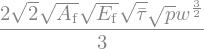

In [21]:
W_w_ = sp.integrate(Pw_pull, w)
sp.simplify(W_w_)

# Stored energy
**Elastic fiber strain $\varepsilon_\mathrm{f,el}(x)$**

As we assumed linear elastic behavior, no dissipation takes place in the pulled out bar

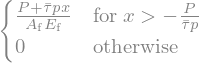

In [39]:
sp.simplify(eps_f_x)

\begin{align}
U = \int_{\Omega_\mathrm{el}} E \varepsilon_\mathrm{f,el}^2(x) 
 \, \mathrm{d}x
\end{align}

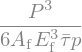

In [41]:
U_P_ = sp.integrate( sp.Rational(1,2) * A_f / E_f * eps_f_x**2, (x,-sp.oo,0))
sp.simplify(U_P_)

But we need it in terms of $w$, not of $P$, ... substitute $P(w)$ for $P$ to obtain

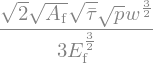

In [38]:
U_w_ = U_P_.subs(P, Pw_pull)
U_w_

# Released energy evaluated as $W - U$

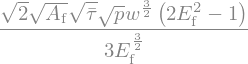

In [42]:
G_w_ = sp.simplify(W_w_ - U_w_)
G_w_

# What is the unloading stiffness at a point $w$?
As we know the area of the triangle below the unloading branch and the corresponding force $P$ we can
obtain the elastic control slip as
\begin{align}
U = \frac{1}{2} P w_{\mathrm{el}} \implies w_\mathrm{el} = \frac{2 U}{P}
\end{align}
So that the amount of plastic slip reads
\begin{align}
w_\mathrm{pl} = w - w_\mathrm{el}
\end{align}

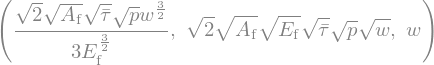

In [43]:
U_w_, Pw_pull, w**(sp.Rational(3,2))/sp.sqrt(w)

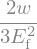

In [44]:
w_el_ = 2 * U_w_ / Pw_pull
w_el_

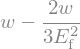

In [45]:
w_pl_ = w - w_el_
sp.simplify(w_pl_)

# Energy release rate

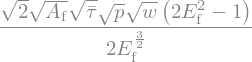

In [46]:
dG_dw_ = G_w_.diff(w)
dG_dw_

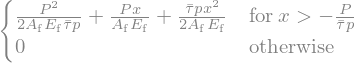

In [47]:
u_fa_x

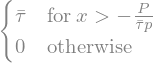

In [48]:
tau_x

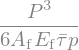

In [49]:
G2_P_ = sp.integrate(p * tau_x * u_fa_x, (x,-sp.oo,0))
G2_P_

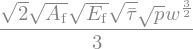

In [50]:
G2_P_.subs(P, Pw_pull)

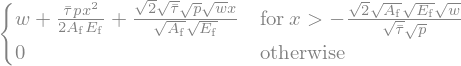

In [51]:
u_fa_x.subs(P, Pw_pull)